In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [32]:
data = pd.read_csv("/content/drive/MyDrive/tobigs/BankChurners.csv")

### 데이터 기본 정보 확인

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.shape

(10127, 23)

In [8]:
# 결측치 존재 x
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category -> object

In [10]:
# 이상치 존재 가능성 확인 (Credit_Limit, Avg_Open_To_Buy, ...)
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [11]:
# 범주형 변수의 class 수 확인
for col in data.columns :
    print(f"{col} : {data[col].nunique()}")

CLIENTNUM : 10127
Attrition_Flag : 2
Customer_Age : 45
Gender : 2
Dependent_count : 6
Education_Level : 7
Marital_Status : 4
Income_Category : 6
Card_Category : 4
Months_on_book : 44
Total_Relationship_Count : 6
Months_Inactive_12_mon : 7
Contacts_Count_12_mon : 7
Credit_Limit : 6205
Total_Revolving_Bal : 1974
Avg_Open_To_Buy : 6813
Total_Amt_Chng_Q4_Q1 : 1158
Total_Trans_Amt : 5033
Total_Trans_Ct : 126
Total_Ct_Chng_Q4_Q1 : 830
Avg_Utilization_Ratio : 964
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 : 1704
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 : 640


### 데이터 전처리

In [33]:
# 불필요한 열 제거
columns_to_drop = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
data.drop(columns=columns_to_drop, inplace=True)

In [36]:
# target 값 매핑
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [14]:
# 범주형 변수의 원-핫 인코딩 적용
data_ = pd.get_dummies(data)

In [15]:
data_

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,1,0,0,0,0,1,0,0,0
10123,0,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,1,0,0,0,0,1,0,0,0
10124,0,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,0,1,0,1,0,0,0
10125,0,30,2,36,4,3,3,5281.0,0,5281.0,...,0,1,0,0,0,0,1,0,0,0


# 앙상블 모델 적용

### XGBoost
트리 기반의 앙상블 학습 모델로 여러 개의 결정 트리(Decision Tree)를 사용하여 예측을 수행하고, 각 트리의 예측 결과를 조합하여 최종 예측을 만드는 알고리즘이다.

In [17]:
# XGBoost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X = data_.drop('Attrition_Flag', axis=1)
y = data_['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.972852912142152


### AdaBoost

약한 학습기(weak learner)들을 순차적으로 학습시켜 오류에 대한 가중치를 조절해가며 강한 학습기(strong learner)를 만들어내는 앙상블 학습 알고리즘 중 하나이다.

In [19]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9585389930898321


### LightGBM
Gradient Boosting 프레임워크로, 큰 규모의 데이터셋에 대한 효율적인 학습과 예측을 지원하는 앙상블 알고리즘이다.

In [20]:
# LightGBM
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(n_estimators=100)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'LightGBM Accuracy: {accuracy_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6779, number of negative: 1322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.836810 -> initscore=1.634684
[LightGBM] [Info] Start training from score 1.634684
LightGBM Accuracy: 0.9733464955577492


### CatBoost
대규모 데이터셋에서 뛰어난 성능을 보이며, 특히 데이터의 특성을 자동으로 이해하여 높은 정확도를 달성할 수 있다. (CatBoost는 카테고리형 변수를 숫자형으로 변환하지 않고 그대로 사용할 수 있어 편리하다.)

In [21]:
# CatBoost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=100, depth=5)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {accuracy_catboost}')

Learning rate set to 0.207912
0:	learn: 0.4779154	total: 60.8ms	remaining: 6.02s
1:	learn: 0.3562711	total: 71.5ms	remaining: 3.5s
2:	learn: 0.2954011	total: 81.7ms	remaining: 2.64s
3:	learn: 0.2451964	total: 91.9ms	remaining: 2.21s
4:	learn: 0.2265506	total: 102ms	remaining: 1.93s
5:	learn: 0.2099678	total: 113ms	remaining: 1.77s
6:	learn: 0.1901429	total: 125ms	remaining: 1.65s
7:	learn: 0.1796866	total: 135ms	remaining: 1.55s
8:	learn: 0.1658414	total: 147ms	remaining: 1.49s
9:	learn: 0.1583563	total: 157ms	remaining: 1.42s
10:	learn: 0.1534185	total: 169ms	remaining: 1.37s
11:	learn: 0.1468137	total: 180ms	remaining: 1.32s
12:	learn: 0.1414149	total: 199ms	remaining: 1.33s
13:	learn: 0.1362894	total: 208ms	remaining: 1.27s
14:	learn: 0.1312259	total: 217ms	remaining: 1.23s
15:	learn: 0.1286591	total: 227ms	remaining: 1.19s
16:	learn: 0.1253365	total: 235ms	remaining: 1.15s
17:	learn: 0.1225047	total: 246ms	remaining: 1.12s
18:	learn: 0.1175392	total: 257ms	remaining: 1.09s
19:	lear

LightGBM 성능이 가장 좋은 것을 확인

# Label Encoding 적용 후 앙상블 모델

In [23]:
# 데이터 복제
df = data

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [29]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

lgb_model = LGBMClassifier(n_estimators=100)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'LightGBM Accuracy: {accuracy_lgb}')

[LightGBM] [Info] Number of positive: 6779, number of negative: 1322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.836810 -> initscore=1.634684
[LightGBM] [Info] Start training from score 1.634684
LightGBM Accuracy: 0.9698914116485686


원핫 인코딩보다 약 0.004 성능 하락

# 변수 선택 후, 앙상블 모델 적용
1. 다중공산성 제거 2. 변수중요도

In [37]:
# 수치형 변수 추출
num_col = data.select_dtypes(include=['float64', 'int64']).drop(['Attrition_Flag'], axis=1)
num_col

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


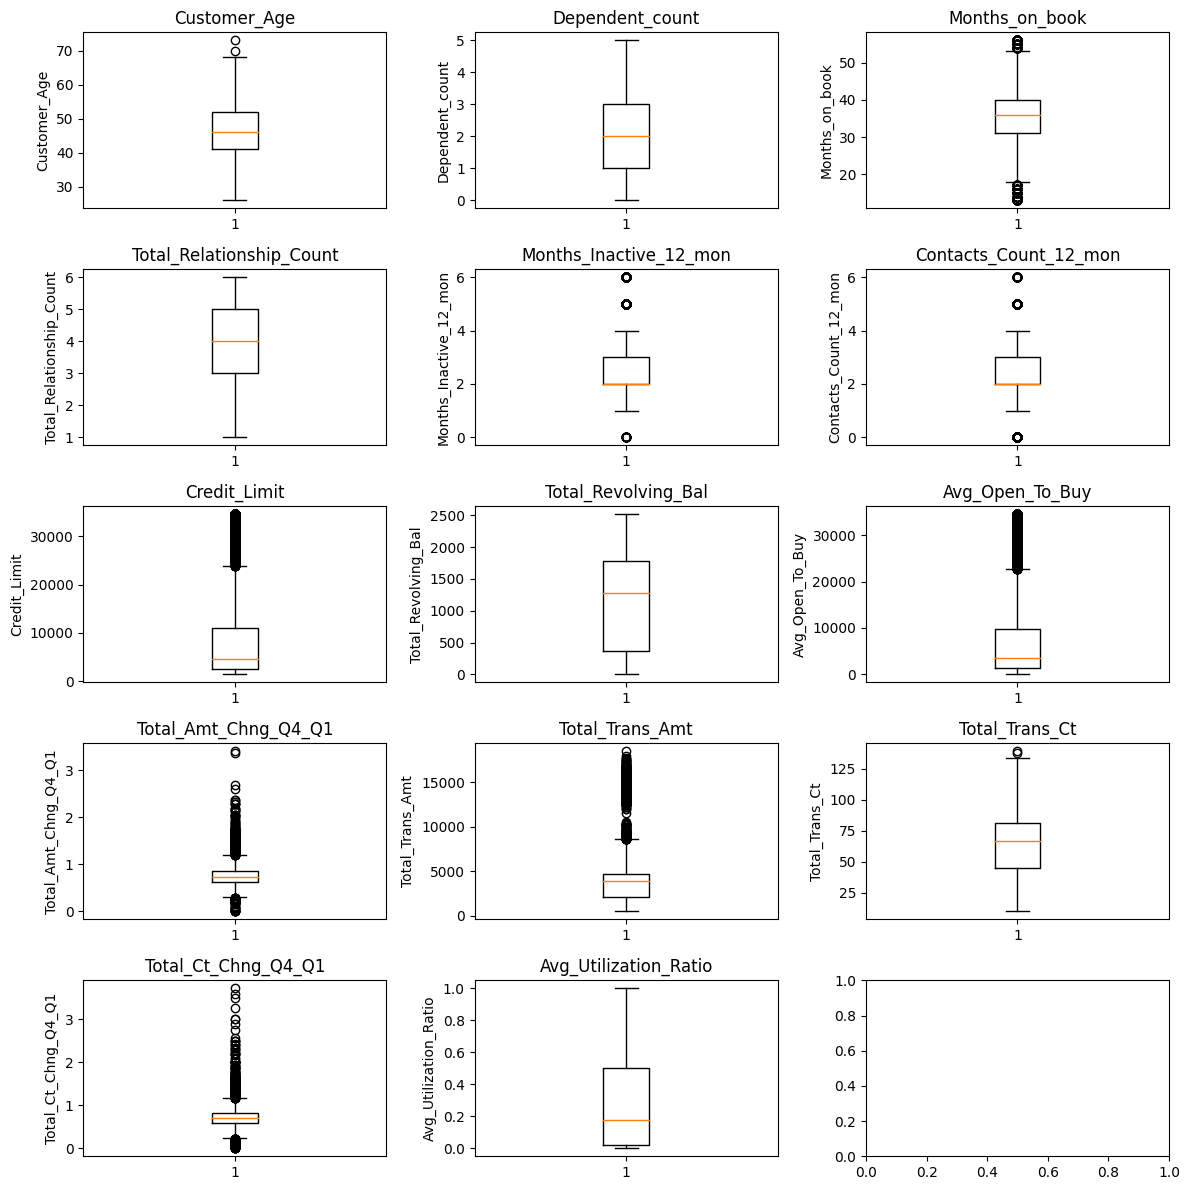

In [38]:
# 수치형 변수의 boxplot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < len(num_col.columns):
        column = num_col.columns[i]
        ax.boxplot(data[column])
        ax.set_title(f'{column}')
        ax.set_ylabel(column)

plt.tight_layout()
plt.show()

data1 = data1.drop(['Customer_Age', 'Credit_Limit','Total_Trans_Ct','Months_on_book','Total_Amt_Chng_Q4_Q1'],axis=1)

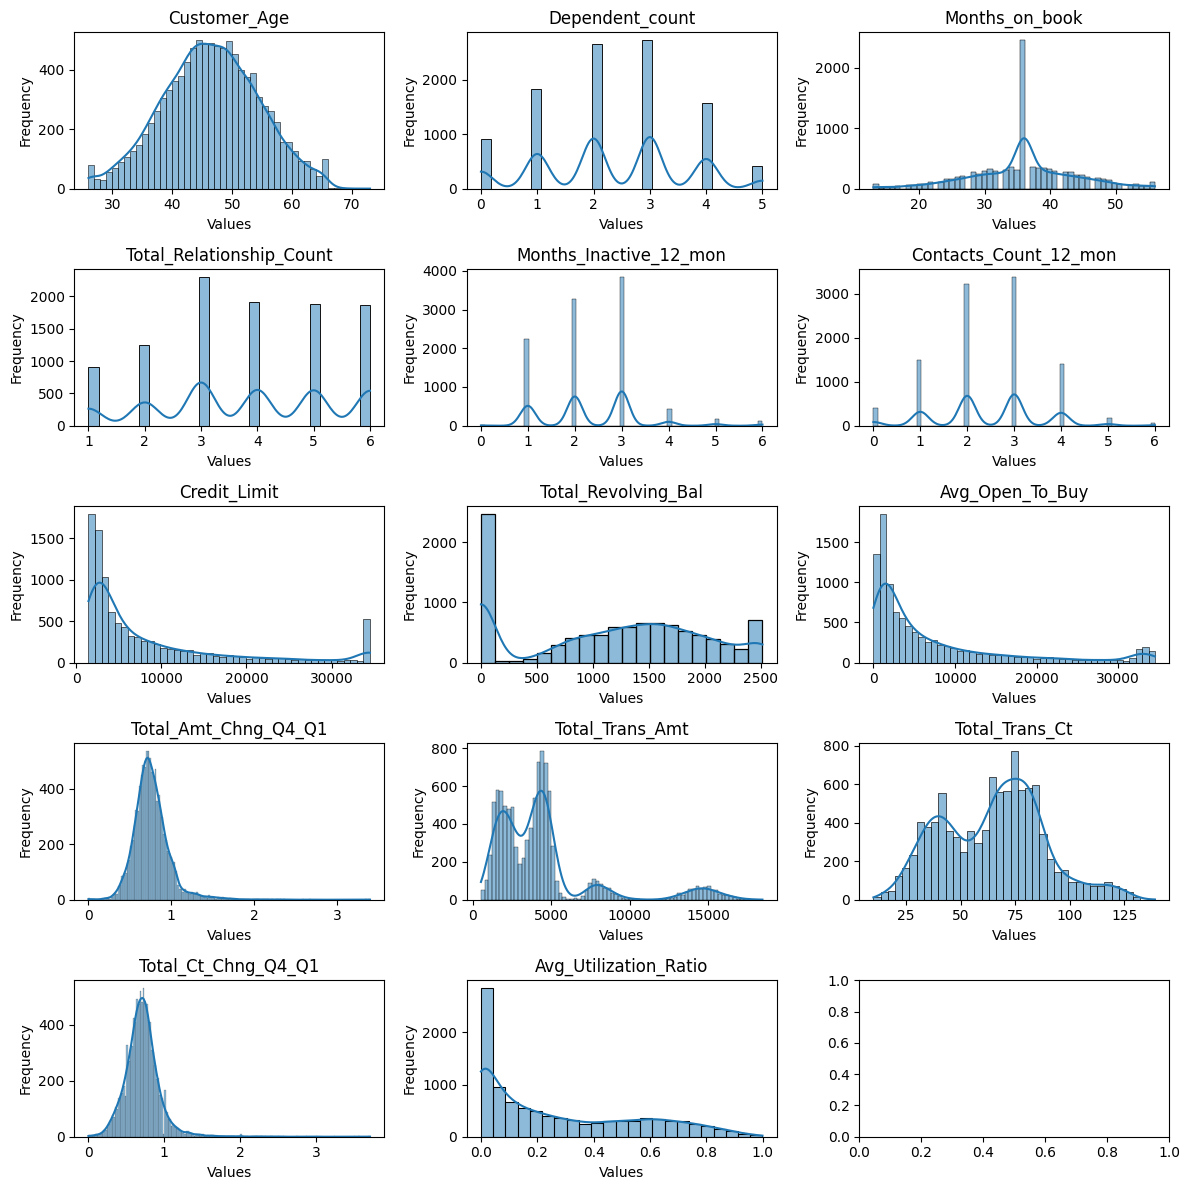

In [39]:
# 수치형 변수의 분포
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < len(num_col.columns):
        column = num_col.columns[i]

        sns.histplot(data[column], ax=ax, kde=True)
        ax.set_title(f'{column}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-40-314dcf175c91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


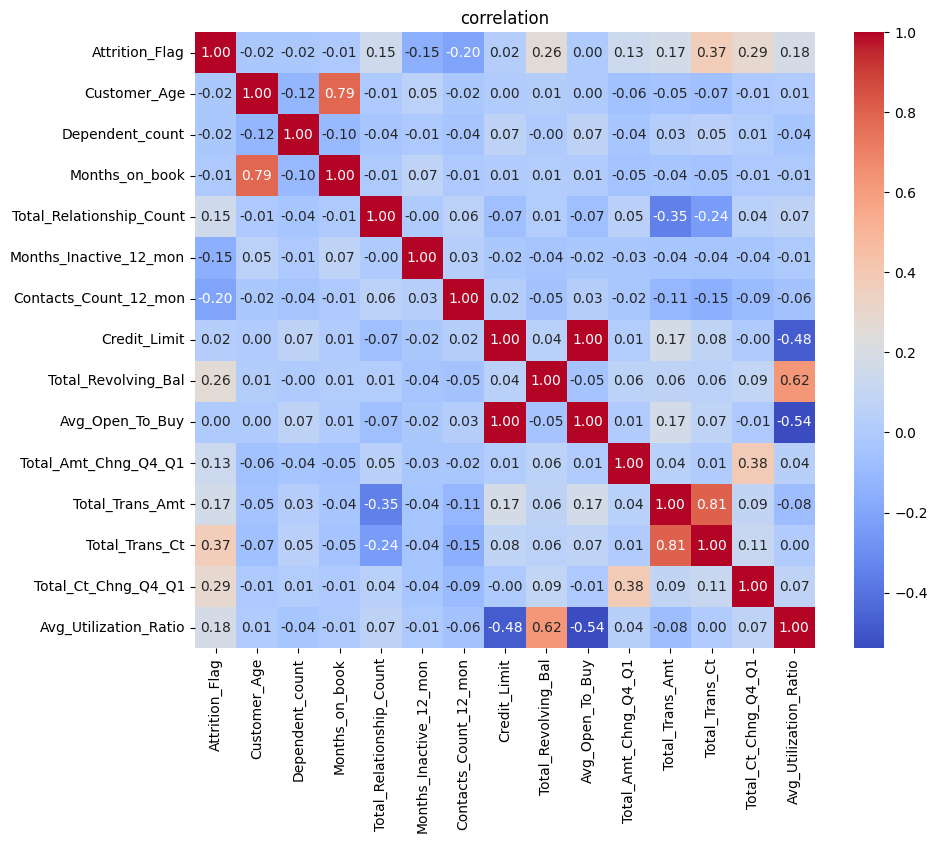

In [40]:
# 상관관계 행렬 출력
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()

In [41]:
# 다중공산성 확인(VIF이용)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = num_col

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Customer_Age,75.090540
1,Dependent_count,4.058599
2,Months_on_book,56.437261
3,Total_Relationship_Count,7.476147
4,Months_Inactive_12_mon,6.084906
5,Contacts_Count_12_mon,5.538823
6,Credit_Limit,inf
7,Total_Revolving_Bal,inf
8,Avg_Open_To_Buy,inf
9,Total_Amt_Chng_Q4_Q1,13.940730


In [42]:
# VIF 높은 열 제거
X=num_col.drop(['Customer_Age', 'Credit_Limit'], axis=1)

In [44]:
vif_data

,Feature,VIF
0,Dependent_count,4.045610
1,Months_on_book,14.878715
2,Total_Relationship_Count,7.364960
3,Months_Inactive_12_mon,6.018303
4,Contacts_Count_12_mon,5.446361
5,Total_Revolving_Bal,6.272345
6,Avg_Open_To_Buy,2.916194
7,Total_Amt_Chng_Q4_Q1,13.786659
8,Total_Trans_Amt,8.623947
9,Total_Trans_Ct,22.887897


In [45]:
# VIF 가장 높은 열 제거
X = X.drop(['Total_Trans_Ct'], axis=1)

In [46]:
vif_data

,Feature,VIF
0,Dependent_count,3.942218
1,Months_on_book,14.156724
2,Total_Relationship_Count,7.083360
3,Months_Inactive_12_mon,5.981972
4,Contacts_Count_12_mon,5.441871
5,Total_Revolving_Bal,6.242233
6,Avg_Open_To_Buy,2.914410
7,Total_Amt_Chng_Q4_Q1,13.764116
8,Total_Trans_Amt,2.969369
9,Total_Ct_Chng_Q4_Q1,11.469736


In [47]:
# VIF 가장 높은 열 제거
X = X.drop(['Months_on_book'], axis=1)

In [48]:
vif_data

,Feature,VIF
0,Dependent_count,3.905034
1,Total_Relationship_Count,6.669794
2,Months_Inactive_12_mon,5.464457
3,Contacts_Count_12_mon,5.168191
4,Total_Revolving_Bal,6.233551
5,Avg_Open_To_Buy,2.888666
6,Total_Amt_Chng_Q4_Q1,13.290672
7,Total_Trans_Amt,2.898562
8,Total_Ct_Chng_Q4_Q1,11.165920
9,Avg_Utilization_Ratio,5.615384


In [49]:
X = X.drop(['Total_Amt_Chng_Q4_Q1'], axis=1)

다중공산성 제거 완료

In [51]:
vif_data

,Feature,VIF
0,Dependent_count,3.881326
1,Total_Relationship_Count,6.324863
2,Months_Inactive_12_mon,5.353107
3,Contacts_Count_12_mon,5.000439
4,Total_Revolving_Bal,6.227298
5,Avg_Open_To_Buy,2.874079
6,Total_Trans_Amt,2.832461
7,Total_Ct_Chng_Q4_Q1,8.123846
8,Avg_Utilization_Ratio,5.600453


In [52]:
# 수치형 변수들의 다중공산성이 제거된 형태의 data_ind 데이터프레임
data_ind = data_.drop(['Customer_Age', 'Credit_Limit','Total_Trans_Ct','Months_on_book','Total_Amt_Chng_Q4_Q1'],axis=1)

In [53]:
data_ind

,Attrition_Flag,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,3,5,1,3,777,11914.0,1144,1.625,0.061,...,0,0,1,0,0,0,1,0,0,0
1,1,5,6,1,2,864,7392.0,1291,3.714,0.105,...,0,0,0,0,1,0,1,0,0,0
2,1,3,4,1,0,0,3418.0,1887,2.333,0.000,...,0,0,0,1,0,0,1,0,0,0
3,1,4,3,4,1,2517,796.0,1171,2.333,0.760,...,0,0,0,0,1,0,1,0,0,0
4,1,3,5,1,0,0,4716.0,816,2.500,0.000,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,2,3,2,3,1851,2152.0,15476,0.857,0.462,...,0,1,0,0,0,0,1,0,0,0
10123,0,2,4,2,3,2186,2091.0,8764,0.683,0.511,...,0,1,0,0,0,0,1,0,0,0
10124,0,1,5,3,4,0,5409.0,10291,0.818,0.000,...,0,0,0,0,1,0,1,0,0,0
10125,0,2,4,3,3,0,5281.0,8395,0.722,0.000,...,0,1,0,0,0,0,1,0,0,0


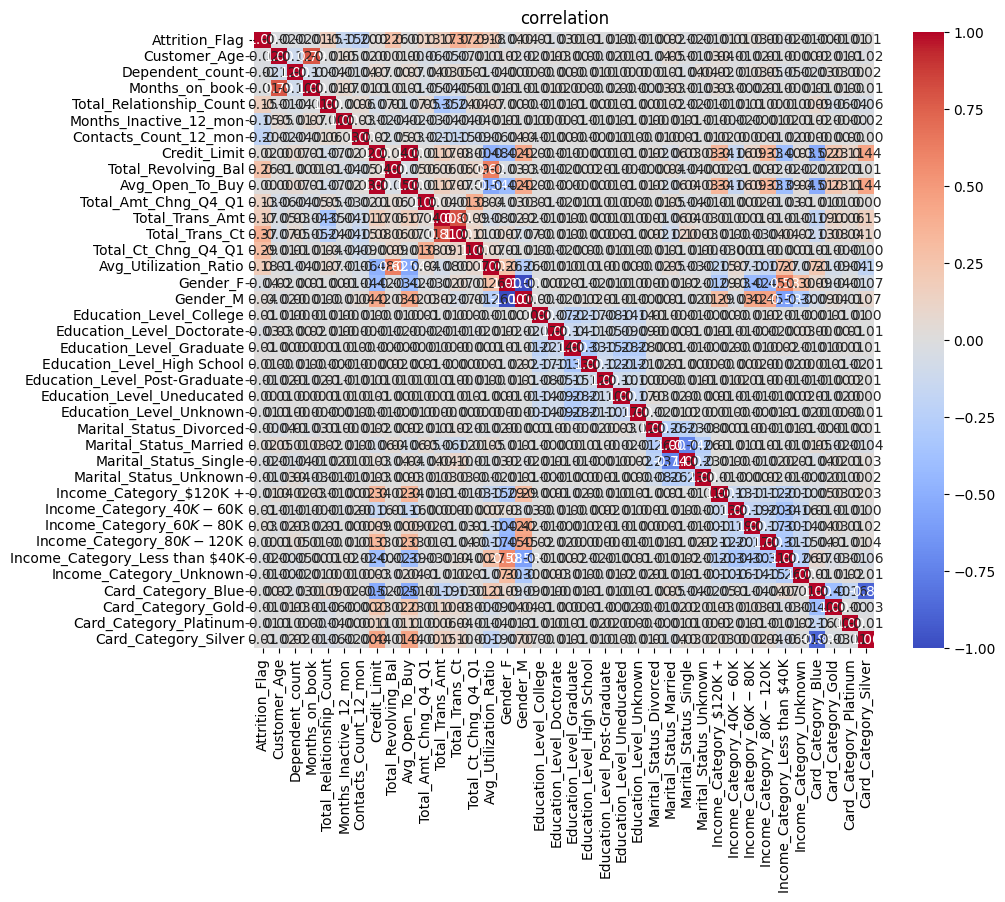

In [54]:
correlation_matrix = data_.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()

In [99]:
# 범주형 변수 불필요한 열 제거 (상관관계 1)
data_ind = data_ind.drop(['Gender_F'],axis=1)

In [59]:
# data_ing 데이터로 lightgbm
X = data_ind.drop(["Attrition_Flag"],axis=1)
y = data_ind['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6801, number of negative: 1300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.839526 -> initscore=1.654705
[LightGBM] [Info] Start training from score 1.654705
Accuracy: 0.9407699901283317


성능이 나아지지 않음

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6779, number of negative: 1322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.836810 -> initscore=1.634684
[LightGBM] [Info] Start training from score 1.634684


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

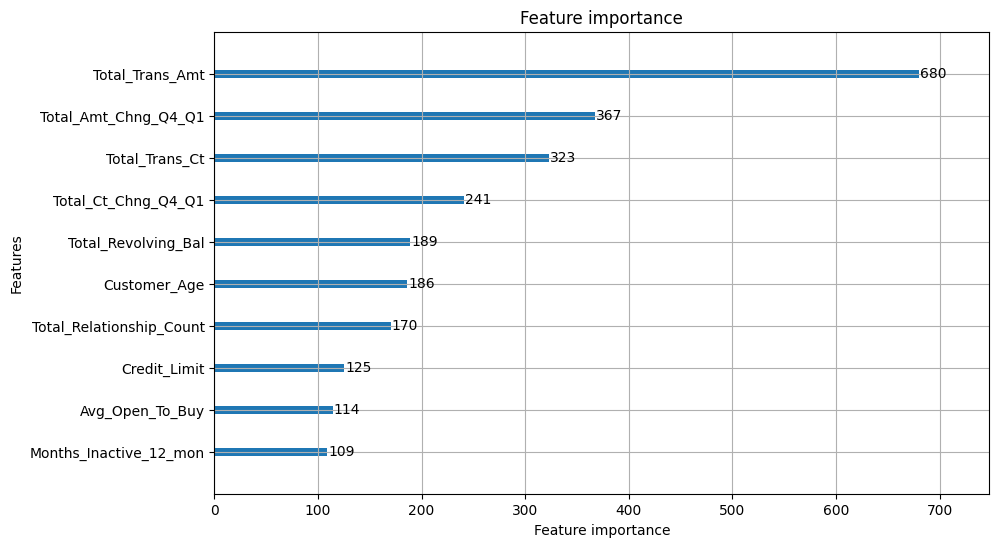

In [60]:
# 변수 중요도 추출
X = data_.drop('Attrition_Flag', axis=1)
y = data_['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
lgb_model = LGBMClassifier(n_estimators=100)
lgb_model.fit(X_train, y_train)
lgb.plot_importance(lgb_model, importance_type='split', max_num_features=10, figsize=(10, 6))

In [88]:
from lightgbm import LGBMClassifier, plot_importance

def get_top_n_features(model, X_train, top_n=10):
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    top_n_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)['Feature'].tolist()
    return top_n_features

X = data_.drop('Attrition_Flag', axis=1)
y = data_['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
lgb_model = LGBMClassifier(n_estimators=100)

# 상위 n개 변수 선택
top_n_features = get_top_n_features(lgb_model, X_train, top_n=22)
# 기존 모델 성능 : 0.9733464955577492

X_train_top_n = X_train[top_n_features]
X_test_top_n = X_test[top_n_features]

# 모델 적용
lgb_model.fit(X_train_top_n, y_train)
y_pred = lgb_model.predict(X_test_top_n)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6779, number of negative: 1322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2067
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.836810 -> initscore=1.634684
[LightGBM] [Info] Start training from score 1.634684
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6779, number of negative: 1322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Numb

변수 중요도를 기준으로 top 22개를 선택했을 때의 성능이 가장 좋지만, 기존 모델의 성능과 일치함 -> 성능이 나아지지 않음